<a href="https://colab.research.google.com/github/Utpal-Mishra/Python-Temperature-Prediction/blob/main/TemperaturePrediction_2Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT LIBRARIES

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

#IMPORT DATA

In [ ]:
from google.colab import drive
drive.mount('/content/Drive/')

Drive already mounted at /content/Drive/; to attempt to forcibly remount, call drive.mount("/content/Drive/", force_remount=True).


In [ ]:
path = '/content/Drive/My Drive/Temperature Prediction/Bias_correction_ucl.csv'
data = pd.read_csv(path)
data.head()

,Station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233948,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.8960,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.3125,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204092,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.5557,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.9648,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.5522,31.2,22.5


In [ ]:
print("Data.shape:", data.shape)

Data.shape: (7752, 25)


#DATA EXPLORATION

In [ ]:
import datetime as dt
data['Date'] = pd.to_datetime(data['Date'])
data['Date']= data['Date'].map(dt.datetime.toordinal)
data.head()

,Station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233948,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.8960,29.1,21.2
1,2.0,735049,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.3125,30.5,22.5
2,3.0,735049,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204092,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.5557,31.1,23.9
3,4.0,735049,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.9648,31.7,24.3
4,5.0,735049,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.5522,31.2,22.5


In [ ]:
print(data.isnull().sum().sum())
data.fillna(value = 0, inplace = True)
print(data.isnull().sum().sum())

1246
0


In [ ]:
data['Present_Tmax'].apply(lambda x: '{:.1f}'.format(x))
data['Present_Tmin'].apply(lambda x: '{:.1f}'.format(x))
data['LDAPS_RHmin'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_RHmax'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_Tmax_lapse'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_Tmin_lapse'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_WS'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_LH'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_CC1'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_CC2'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_CC3'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_CC4'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_PPT1'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_PPT2'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_PPT3'].apply(lambda x: '{:.7f}'.format(x))
data['LDAPS_PPT4'].apply(lambda x: '{:.7f}'.format(x))
data['lat'].apply(lambda x: '{:.4f}'.format(x))
data['lon'].apply(lambda x: '{:.3f}'.format(x))
data['DEM'].apply(lambda x: '{:.4f}'.format(x))
data['Slope'].apply(lambda x: '{:.4f}'.format(x))
data['Solar radiation'].apply(lambda x: '{:.4f}'.format(x))
data['Next_Tmax'].apply(lambda x: '{:.1f}'.format(x))
data['Next_Tmin'].apply(lambda x: '{:.1f}'.format(x))

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7747    18.1
7748    18.8
7749    17.4
7750    11.3
7751    29.8
Name: Next_Tmin, Length: 7752, dtype: object

In [ ]:
print(np.any(np.isnan(data)))
print(np.all(np.isfinite(data)))

False
True


#VISUALIZATION

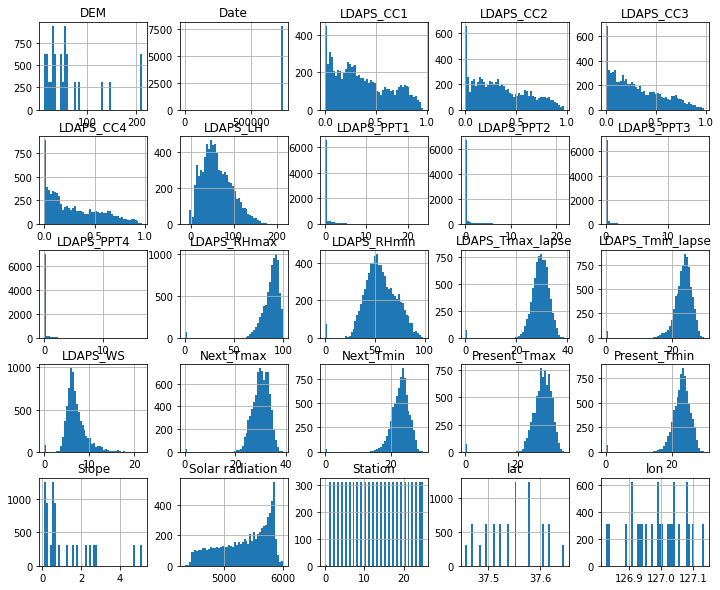

In [ ]:
data.hist(figsize = (12,10), bins = 50)
plt.show()

#MODEL TRAINING

###DATA SPLITTING

In [ ]:
X = data.drop(['Next_Tmax', 'Next_Tmin'], axis=1).values
Y1 = data['Next_Tmax'].values
Y2 = data['Next_Tmin'].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y1_train, Y1_test = train_test_split(X, Y1, test_size = 0.2)
print("X_train.shape:", X_train.shape, "X_test.shape:", X_test.shape, "Y1_train.shape:", Y1_train.shape, "Y1_test.shape:", Y1_test.shape)

X_train, X_test, Y2_train, Y2_test = train_test_split(X, Y2, test_size = 0.2)
print("X_train.shape:", X_train.shape, "X_test.shape:", X_test.shape, "Y2_train.shape:", Y2_train.shape, "Y2_test.shape:", Y2_test.shape)

X_train.shape: (6201, 23) X_test.shape: (1551, 23) Y1_train.shape: (6201,) Y1_test.shape: (1551,)
X_train.shape: (6201, 23) X_test.shape: (1551, 23) Y2_train.shape: (6201,) Y2_test.shape: (1551,)


In [ ]:
REGRESSOR = ['LINEAR REGRESSION (Y1, Y2)','RIDGE REGRESSION (Y1, Y2)','RIDGE COMPLEXITY (Y1, Y2)','LASSO REGRESSION (Y1, Y2)','LARS LASSO REGRESSION (Y1, Y2)',
             'BAYESIAN RIDGE REGRESSION (Y1, Y2)', 'SVM (Y1, Y2)', 'GRADIENT BOOSTING REGRESSION (Y1, Y2)', 'DECISION TREE (Y1, Y2)','RANDOM FOREST','ADABOOST (Y1, Y2)',
             'GRADIENT DESCENT REGRESSION (Y1, Y2)','VOTING REGRESSION (Y1, Y2)','XGBOOST (Y1, Y2)']
TRAIN_ACCURACY = []
VARIANCE_SCORE = []
MAX_ERROR = []
ABSOLUTE_ERROR = []
MEAN_SQUARED_ERROR = []
MEDIAN_ABSOLUTE_ERROR = []
R_SQUARE_SCORE = []

#LINEAR REGRESSION

In [ ]:
from sklearn import linear_model, metrics

LR1 = linear_model.LinearRegression(normalize=True)

LR1.fit(X_train, Y1_train)
LR1_pred = LR1.predict(X_test)
#print ('Coefficients: ', LR1.coef_)
#print ('Intercept: ', LR1.intercept_)

LR2 = linear_model.LinearRegression(normalize=True)

LR2.fit(X_train, Y2_train)
LR2_pred = LR2.predict(X_test)
#print ('Coefficients: ', LR2.coef_)
#print ('Intercept: ', LR2.intercept_)

"""print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", LR.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,LR_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test,LR_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test,LR_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test,LR_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test,LR_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test,LR_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test,LR_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test,LR_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test,LR_pred))"""

TRAIN_ACCURACY.append((LR1.score(X_train, Y1_train), LR2.score(X_train, Y2_train)))
VARIANCE_SCORE.append((metrics.explained_variance_score(Y1_test, LR1_pred), metrics.explained_variance_score(Y2_test, LR2_pred)))
MAX_ERROR.append((metrics.max_error(Y1_test,LR1_pred), metrics.max_error(Y2_test,LR2_pred)))
ABSOLUTE_ERROR.append((metrics.mean_absolute_error(Y1_test,LR1_pred), metrics.mean_absolute_error(Y2_test,LR2_pred)))
MEAN_SQUARED_ERROR.append((metrics.mean_squared_error(Y1_test,LR1_pred), metrics.mean_squared_error(Y2_test,LR2_pred)))
MEDIAN_ABSOLUTE_ERROR.append((metrics.median_absolute_error(Y1_test,LR1_pred), metrics.median_absolute_error(Y2_test,LR2_pred)))
R_SQUARE_SCORE.append((metrics.r2_score(Y1_test,LR1_pred), metrics.r2_score(Y2_test,LR2_pred)))

#RIDGE REGRESSION

In [ ]:
from sklearn import linear_model, metrics

RR1 = linear_model.Ridge(alpha=.5)
RR1.fit(X_train, Y1_train)
RR1_pred = RR1.predict(X_test)
#print ('Coefficients: ', RR1.coef_)
#print ('Intercept: ', RR1.intercept_)

RR2 = linear_model.Ridge(alpha=.5)
RR2.fit(X_train, Y2_train)
RR2_pred = RR2.predict(X_test)
#print ('Coefficients: ', RR2.coef_)
#print ('Intercept: ', RR2.intercept_)

"""print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", RR.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,RR_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test,RR_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test,RR_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test,RR_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test,RR_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test,RR_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test,RR_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test,RR_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test,RR_pred))"""

TRAIN_ACCURACY.append((RR1.score(X_train, Y1_train), RR2.score(X_train, Y2_train)))
VARIANCE_SCORE.append((metrics.explained_variance_score(Y1_test,RR1_pred), metrics.explained_variance_score(Y2_test,RR2_pred)))
MAX_ERROR.append((metrics.max_error(Y1_test,RR1_pred), metrics.max_error(Y2_test,RR2_pred)))
ABSOLUTE_ERROR.append((metrics.mean_absolute_error(Y1_test,RR1_pred), metrics.mean_absolute_error(Y2_test,RR2_pred)))
MEAN_SQUARED_ERROR.append((metrics.mean_squared_error(Y1_test,RR1_pred), metrics.mean_squared_error(Y2_test,RR2_pred)))
MEDIAN_ABSOLUTE_ERROR.append((metrics.median_absolute_error(Y1_test,RR1_pred), metrics.median_absolute_error(Y2_test,RR2_pred)))
R_SQUARE_SCORE.append((metrics.r2_score(Y1_test,RR1_pred), metrics.r2_score(Y2_test,RR2_pred)))

#RIDGE COMPLEXITY

In [ ]:
from sklearn import linear_model, metrics

RC1 = linear_model.RidgeCV()
RC1.fit(X_train, Y1_train)
RC1_pred = RC1.predict(X_test)
#print ('Coefficients: ', RC1.coef_)
#print ('Intercept: ', RC1.intercept_)

RC2 = linear_model.RidgeCV()
RC2.fit(X_train, Y2_train)
RC2_pred = RC2.predict(X_test)
#print ('Coefficients: ', RC2.coef_)
#print ('Intercept: ', RC2.intercept_)

"""print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", RC.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,RC_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test,RC_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test,RC_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test,RC_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test,RC_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test,RC_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test,RC_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test,RC_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test,RC_pred))"""

TRAIN_ACCURACY.append((RC1.score(X_train, Y1_train), RC2.score(X_train, Y2_train)))
VARIANCE_SCORE.append((metrics.explained_variance_score(Y1_test,RC1_pred), metrics.explained_variance_score(Y2_test,RC2_pred)))
MAX_ERROR.append((metrics.max_error(Y1_test,RC1_pred), metrics.max_error(Y2_test,RC2_pred)))
ABSOLUTE_ERROR.append((metrics.mean_absolute_error(Y1_test,RC1_pred), metrics.mean_absolute_error(Y2_test,RC2_pred)))
MEAN_SQUARED_ERROR.append((metrics.mean_squared_error(Y1_test,RC1_pred), metrics.mean_squared_error(Y2_test,RC2_pred)))
MEDIAN_ABSOLUTE_ERROR.append((metrics.median_absolute_error(Y1_test,RC1_pred), metrics.median_absolute_error(Y2_test,RC2_pred)))
R_SQUARE_SCORE.append((metrics.r2_score(Y1_test,RC1_pred), metrics.r2_score(Y2_test,RC2_pred)))

#LASSO REGRESSION

In [ ]:
from sklearn import linear_model, metrics

LassoR1 = linear_model.Lasso(alpha=0.1)
LassoR1.fit(X_train, Y1_train)
LassoR1_pred = LassoR1.predict(X_test)
#print ('Coefficients: ', LassoR1.coef_)
#print ('Intercept: ', LassoR1.intercept_)

LassoR2 = linear_model.Lasso(alpha=0.1)
LassoR2.fit(X_train, Y2_train)
LassoR2_pred = LassoR2.predict(X_test)
#print ('Coefficients: ', LassoR2.coef_)
#print ('Intercept: ', LassoR2.intercept_)

"""print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", LassoR.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,LassoR_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test, LassoR_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test, LassoR_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test, LassoR_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test, LassoR_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test, LassoR_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test, LassoR_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test, LassoR_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test,LassoR_pred))"""

TRAIN_ACCURACY.append((LassoR1.score(X_train, Y1_train), LassoR2.score(X_train, Y2_train)))
VARIANCE_SCORE.append((metrics.explained_variance_score(Y1_test,LassoR1_pred), metrics.explained_variance_score(Y2_test,LassoR2_pred)))
MAX_ERROR.append((metrics.max_error(Y1_test, LassoR1_pred), metrics.max_error(Y2_test, LassoR2_pred)))
ABSOLUTE_ERROR.append((metrics.mean_absolute_error(Y1_test, LassoR1_pred), metrics.mean_absolute_error(Y2_test, LassoR2_pred)))
MEAN_SQUARED_ERROR.append((metrics.mean_squared_error(Y1_test, LassoR1_pred), metrics.mean_squared_error(Y2_test, LassoR2_pred)))
MEDIAN_ABSOLUTE_ERROR.append((metrics.median_absolute_error(Y1_test, LassoR1_pred), metrics.median_absolute_error(Y2_test, LassoR2_pred)))
R_SQUARE_SCORE.append((metrics.r2_score(Y1_test, LassoR1_pred), metrics.r2_score(Y2_test, LassoR2_pred)))

#LARS LASSO REGRESSION

In [ ]:
from sklearn import linear_model, metrics

LARSLassoR1 = linear_model.LassoLars(alpha=0.1)
LARSLassoR1.fit(X_train, Y1_train)
LARSLassoR1_pred = LARSLassoR1.predict(X_test)
#print ('Coefficients: ', LARSLassoR1.coef_)
#print ('Intercept: ', LARSLassoR1.intercept_)

LARSLassoR2 = linear_model.LassoLars(alpha=0.1)
LARSLassoR2.fit(X_train, Y2_train)
LARSLassoR2_pred = LARSLassoR2.predict(X_test)
#print ('Coefficients: ', LARSLassoR2.coef_)
#print ('Intercept: ', LARSLassoR2.intercept_)

"""print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", LARSLassoR.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,LARSLassoR_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test, LARSLassoR_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test, LARSLassoR_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test, LARSLassoR_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test, LARSLassoR_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test, LARSLassoR_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test, LARSLassoR_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test, LARSLassoR_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test,LARSLassoR_pred))"""

TRAIN_ACCURACY.append((LARSLassoR1.score(X_train, Y1_train), LARSLassoR2.score(X_train, Y2_train)))
VARIANCE_SCORE.append((metrics.explained_variance_score(Y1_test,LARSLassoR1_pred), metrics.explained_variance_score(Y2_test,LARSLassoR2_pred)))
MAX_ERROR.append((metrics.max_error(Y1_test, LARSLassoR1_pred), metrics.max_error(Y2_test, LARSLassoR2_pred)))
ABSOLUTE_ERROR.append((metrics.mean_absolute_error(Y1_test, LARSLassoR1_pred), metrics.mean_absolute_error(Y2_test, LARSLassoR2_pred)))
MEAN_SQUARED_ERROR.append((metrics.mean_squared_error(Y1_test, LARSLassoR1_pred), metrics.mean_squared_error(Y2_test, LARSLassoR2_pred)))
MEDIAN_ABSOLUTE_ERROR.append((metrics.median_absolute_error(Y1_test, LARSLassoR1_pred), metrics.median_absolute_error(Y2_test, LARSLassoR2_pred)))
R_SQUARE_SCORE.append((metrics.r2_score(Y1_test, LARSLassoR1_pred), metrics.r2_score(Y2_test, LARSLassoR2_pred)))

#BAYESIAN RIDGE REGRESSION


In [ ]:
from sklearn import linear_model, metrics

BRR1 = linear_model.BayesianRidge()
BRR1.fit(X_train, Y1_train)
BRR1_pred = BRR1.predict(X_test)
#print ('Coefficients: ', BRR1.coef_)
#print ('Intercept: ', BRR1.intercept_)

BRR2 = linear_model.BayesianRidge()
BRR2.fit(X_train, Y2_train)
BRR2_pred = BRR2.predict(X_test)
#print ('Coefficients: ', BRR2.coef_)
#print ('Intercept: ', BRR2.intercept_)

"""print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", BRR.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test, BRR_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test, BRR_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test, BRR_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test, BRR_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test, BRR_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test, BRR_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test, BRR_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test, BRR_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test, BRR_pred))"""

TRAIN_ACCURACY.append((BRR1.score(X_train, Y1_train), BRR2.score(X_train, Y2_train)))
VARIANCE_SCORE.append((metrics.explained_variance_score(Y1_test, BRR1_pred), metrics.explained_variance_score(Y2_test, BRR2_pred)))
MAX_ERROR.append((metrics.max_error(Y1_test, BRR1_pred), metrics.max_error(Y2_test, BRR2_pred)))
ABSOLUTE_ERROR.append((metrics.mean_absolute_error(Y1_test, BRR1_pred), metrics.mean_absolute_error(Y2_test, BRR2_pred)))
MEAN_SQUARED_ERROR.append((metrics.mean_squared_error(Y1_test, BRR1_pred), metrics.mean_squared_error(Y2_test, BRR2_pred)))
MEDIAN_ABSOLUTE_ERROR.append((metrics.median_absolute_error(Y1_test, BRR1_pred), metrics.median_absolute_error(Y2_test, BRR2_pred)))
R_SQUARE_SCORE.append((metrics.r2_score(Y1_test, BRR1_pred), metrics.r2_score(Y2_test, BRR2_pred)))

#SVM

In [ ]:
from sklearn.svm import SVR

SVM1 = SVR(kernel='rbf')
SVM1.fit(X_train, Y1_train)
SVM1_pred = SVM1.predict(X_test)
#print ('Coefficients: ', SVM.coef_)
#print ('Intercept: ', SVM.intercept_)

SVM2 = SVR(kernel='rbf')
SVM2.fit(X_train, Y2_train)
SVM2_pred = SVM2.predict(X_test)
#print ('Coefficients: ', SVM.coef_)
#print ('Intercept: ', SVM.intercept_)

"""print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", SVM.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,SVM_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test, SVM_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test, SVM_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test, SVM_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test, SVM_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test, SVM_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test, SVM_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test, SVM_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test, SVM_pred))"""

TRAIN_ACCURACY.append((SVM1.score(X_train, Y1_train), SVM2.score(X_train, Y2_train)))
VARIANCE_SCORE.append((metrics.explained_variance_score(Y1_test,SVM2_pred), metrics.explained_variance_score(Y2_test,SVM2_pred)))
MAX_ERROR.append((metrics.max_error(Y1_test, SVM1_pred), metrics.max_error(Y2_test, SVM2_pred)))
ABSOLUTE_ERROR.append((metrics.mean_absolute_error(Y1_test, SVM1_pred), metrics.mean_absolute_error(Y2_test, SVM2_pred)))
MEAN_SQUARED_ERROR.append((metrics.mean_squared_error(Y1_test, SVM1_pred), metrics.mean_squared_error(Y2_test, SVM2_pred)))
MEDIAN_ABSOLUTE_ERROR.append((metrics.median_absolute_error(Y1_test, SVM1_pred), metrics.median_absolute_error(Y2_test, SVM2_pred)))
R_SQUARE_SCORE.append((metrics.r2_score(Y1_test, SVM1_pred), metrics.r2_score(Y2_test, SVM2_pred)))

#GRADIENT BOOSTING REGRESSION

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import sklearn.metrics

GBR1 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls').fit(X_train, Y1_train)
#print("MEAN SQUARE ERROR: ", metrics.mean_squared_error(Y_test, GBR.predict(X_test)))
GBR_PRED1 = GBR1.predict(X_test)

GBR2 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls').fit(X_train, Y2_train)
#print("MEAN SQUARE ERROR: ", metrics.mean_squared_error(Y_test, GBR.predict(X_test)))
GBR_PRED2 = GBR2.predict(X_test)

"""print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", GBR.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,RR_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test,RR_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test,RR_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test,RR_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test,RR_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test,RR_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test,RR_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test,RR_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test,RR_pred))"""

TRAIN_ACCURACY.append((GBR1.score(X_train, Y1_train), GBR2.score(X_train, Y2_train)))
VARIANCE_SCORE.append((metrics.explained_variance_score(Y1_test,RR1_pred), metrics.explained_variance_score(Y2_test,RR2_pred)))
MAX_ERROR.append((metrics.max_error(Y1_test,RR1_pred), metrics.max_error(Y2_test,RR2_pred)))
ABSOLUTE_ERROR.append((metrics.mean_absolute_error(Y1_test,RR1_pred), metrics.mean_absolute_error(Y2_test,RR2_pred)))
MEAN_SQUARED_ERROR.append((metrics.mean_squared_error(Y1_test,RR1_pred), metrics.mean_squared_error(Y2_test,RR2_pred)))
MEDIAN_ABSOLUTE_ERROR.append((metrics.median_absolute_error(Y1_test,RR1_pred), metrics.median_absolute_error(Y2_test,RR2_pred)))
R_SQUARE_SCORE.append((metrics.r2_score(Y1_test,RR2_pred), metrics.r2_score(Y2_test,RR2_pred)))

#DECISiON TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DT1 = DecisionTreeRegressor()
DT1.fit(X_train, Y1_train)
DT1_pred = DT1.predict(X_test)

DT2 = DecisionTreeRegressor()
DT2.fit(X_train, Y2_train)
DT2_pred = DT2.predict(X_test)

"""print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", DT.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,DT_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test, DT_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test, DT_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test, DT_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test,DT_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test,DT_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test, DT_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test, DT_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test, DT_pred))"""

TRAIN_ACCURACY.append((DT1.score(X_train, Y1_train), DT2.score(X_train, Y2_train)))
VARIANCE_SCORE.append((metrics.explained_variance_score(Y1_test,DT1_pred), metrics.explained_variance_score(Y2_test,DT2_pred)))
MAX_ERROR.append((metrics.max_error(Y1_test, DT1_pred), metrics.max_error(Y2_test, DT2_pred)))
ABSOLUTE_ERROR.append((metrics.mean_absolute_error(Y1_test, DT1_pred), metrics.mean_absolute_error(Y2_test, DT2_pred)))
MEAN_SQUARED_ERROR.append((metrics.mean_squared_error(Y1_test, DT1_pred), metrics.mean_squared_error(Y2_test, DT2_pred)))
MEDIAN_ABSOLUTE_ERROR.append((metrics.median_absolute_error(Y1_test,DT1_pred), metrics.median_absolute_error(Y2_test,DT2_pred)))
R_SQUARE_SCORE.append((metrics.r2_score(Y1_test, DT1_pred), metrics.r2_score(Y2_test, DT2_pred)))

#RANDOM FOREST

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

RF1 = RandomForestRegressor()
RF1.fit(X_train, Y1_train)
RF1_pred = RF1.predict(X_test)

RF2 = RandomForestRegressor()
RF2.fit(X_train, Y2_train)
RF2_pred = RF2.predict(X_test)

"""print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", RF.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,RF_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test, RF_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test, RF_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test, RF_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test, RF_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test, RF_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test, RF_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test, RF_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test, RF_pred))"""

TRAIN_ACCURACY.append((RF1.score(X_train, Y1_train), RF2.score(X_train, Y2_train)))
VARIANCE_SCORE.append((metrics.explained_variance_score(Y1_test,RF1_pred), metrics.explained_variance_score(Y2_test,RF2_pred)))
MAX_ERROR.append((metrics.max_error(Y1_test, RF1_pred), metrics.max_error(Y2_test, RF2_pred)))
ABSOLUTE_ERROR.append((metrics.mean_absolute_error(Y1_test, RF1_pred), metrics.mean_absolute_error(Y2_test, RF2_pred)))
MEAN_SQUARED_ERROR.append((metrics.mean_squared_error(Y1_test, RF1_pred), metrics.mean_squared_error(Y2_test, RF2_pred)))
MEDIAN_ABSOLUTE_ERROR.append((metrics.median_absolute_error(Y1_test, RF1_pred), metrics.median_absolute_error(Y2_test, RF2_pred)))
R_SQUARE_SCORE.append((metrics.r2_score(Y1_test, RF1_pred), metrics.r2_score(Y2_test, RF2_pred)))

#ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

ABR1 = AdaBoostRegressor(random_state=0, n_estimators=100)
ABR1.fit(X_train, Y1_train)
ABR1_pred = ABR1.predict(X_test)

ABR2 = AdaBoostRegressor(random_state=0, n_estimators=100)
ABR2.fit(X_train, Y2_train)
ABR2_pred = ABR2.predict(X_test)

"""print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", ABR.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,ABR_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test, ABR_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test, ABR_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test, ABR_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test, ABR_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test, ABR_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test, ABR_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test, ABR_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test, ABR_pred))"""

TRAIN_ACCURACY.append((ABR1.score(X_train, Y1_train), ABR2.score(X_train, Y2_train)))
VARIANCE_SCORE.append((metrics.explained_variance_score(Y1_test,ABR1_pred), metrics.explained_variance_score(Y2_test,ABR2_pred)))
MAX_ERROR.append((metrics.max_error(Y1_test, ABR1_pred), metrics.max_error(Y2_test, ABR2_pred)))
ABSOLUTE_ERROR.append((metrics.mean_absolute_error(Y1_test, ABR1_pred), metrics.mean_absolute_error(Y2_test, ABR2_pred)))
MEAN_SQUARED_ERROR.append((metrics.mean_squared_error(Y1_test, ABR1_pred), metrics.mean_squared_error(Y2_test, ABR2_pred)))
MEDIAN_ABSOLUTE_ERROR.append((metrics.median_absolute_error(Y1_test, ABR1_pred), metrics.median_absolute_error(Y2_test, ABR2_pred)))
R_SQUARE_SCORE.append((metrics.r2_score(Y1_test, ABR1_pred), metrics.r2_score(Y2_test, ABR2_pred)))

#GRADIENT DESCENT REGRESSION

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

GDR1 = GradientBoostingRegressor(random_state=0, n_estimators=100)
GDR1.fit(X_train, Y1_train)
GDR1_pred = GDR1.predict(X_test)

GDR2 = GradientBoostingRegressor(random_state=0, n_estimators=100)
GDR2.fit(X_train, Y2_train)
GDR2_pred = GDR2.predict(X_test)

"""print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", GDR.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,GDR_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test, GDR_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test, GDR_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test, GDR_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test, GDR_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test, GDR_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test, GDR_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test, GDR_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test, GDR_pred))"""

TRAIN_ACCURACY.append((GDR1.score(X_train, Y1_train), GDR2.score(X_train, Y2_train)))
VARIANCE_SCORE.append((metrics.explained_variance_score(Y1_test,GDR1_pred), metrics.explained_variance_score(Y2_test,GDR2_pred)))
MAX_ERROR.append((metrics.max_error(Y1_test, GDR1_pred), metrics.max_error(Y2_test, GDR2_pred)))
ABSOLUTE_ERROR.append((metrics.mean_absolute_error(Y1_test, GDR1_pred), metrics.mean_absolute_error(Y2_test, GDR2_pred)))
MEAN_SQUARED_ERROR.append((metrics.mean_squared_error(Y1_test, GDR1_pred), metrics.mean_squared_error(Y2_test, GDR2_pred)))
MEDIAN_ABSOLUTE_ERROR.append((metrics.median_absolute_error(Y1_test, GDR1_pred), metrics.median_absolute_error(Y2_test, GDR2_pred)))
R_SQUARE_SCORE.append((metrics.r2_score(Y1_test, GDR1_pred), metrics.r2_score(Y2_test, GDR2_pred)))

#VOTING REGRESSION

In [ ]:
from sklearn.ensemble import VotingRegressor

VR1 = VotingRegressor([('LinearR', LR1),('RandomFR', RF1)])
VR1.fit(X_train, Y1_train)
VR1_pred = VR1.predict(X_test)

VR2 = VotingRegressor([('LinearR', LR2),('RandomFR', RF2)])
VR2.fit(X_train, Y2_train)
VR2_pred = VR2.predict(X_test)

"""print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", VR.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test,VR_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test, VR_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test, VR_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test, VR_pred))
#print("MEAN SQUARED LOG ERROR: ", metrics.mean_squared_log_error(Y_test, VR_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test, VR_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test, VR_pred))
#print("MEAN POISSON DEVIANCE: ", metrics.mean_poisson_deviance(Y_test, VR_pred))
#print("MEAN GAMMA DEVIANCE: ", metrics.mean_gamma_deviance(Y_test, VR_pred))"""

TRAIN_ACCURACY.append((VR1.score(X_train, Y1_train), VR2.score(X_train, Y2_train)))
VARIANCE_SCORE.append((metrics.explained_variance_score(Y1_test,VR1_pred), metrics.explained_variance_score(Y2_test,VR2_pred)))
MAX_ERROR.append((metrics.max_error(Y1_test, VR1_pred), metrics.max_error(Y2_test, VR2_pred)))
ABSOLUTE_ERROR.append((metrics.mean_absolute_error(Y1_test, VR1_pred), metrics.mean_absolute_error(Y2_test, VR2_pred)))
MEAN_SQUARED_ERROR.append((metrics.mean_squared_error(Y1_test, VR1_pred), metrics.mean_squared_error(Y2_test, VR2_pred)))
MEDIAN_ABSOLUTE_ERROR.append((metrics.median_absolute_error(Y1_test, VR1_pred), metrics.median_absolute_error(Y2_test, VR2_pred)))
R_SQUARE_SCORE.append((metrics.r2_score(Y1_test, VR1_pred), metrics.r2_score(Y2_test, VR2_pred)))

#XGBOOST

In [ ]:
import xgboost

XGB1 = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
XGB1.fit(X_train, Y1_train)
XGB1_pred = XGB1.predict(X_test)

XGB2 = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
XGB2.fit(X_train, Y2_train)
XGB2_pred = XGB2.predict(X_test)

"""print("\nREGRESSION REPORT:\n")
print("TRAINING ACCURACY:\t", XGB.score(X_train, Y_train))
print("VARIANCE SCORE:\t\t", metrics.explained_variance_score(Y_test, XGB_pred))
print("MAX ERROR:\t\t", metrics.max_error(Y_test, XGB_pred))
print("ABSOLUTE ERROR:\t\t", metrics.mean_absolute_error(Y_test, XGB_pred))
print("MEAN SQUARED ERROR:\t", metrics.mean_squared_error(Y_test, XGB_pred))
print("MEDIAN ABSOLUTE ERROR:  ", metrics.median_absolute_error(Y_test, XGB_pred))
print("R-SQUARE SCORE:  \t", metrics.r2_score(Y_test, XGB_pred))"""

TRAIN_ACCURACY.append((XGB1.score(X_train, Y1_train), XGB2.score(X_train, Y2_train)))
VARIANCE_SCORE.append((metrics.explained_variance_score(Y1_test, XGB1_pred), metrics.explained_variance_score(Y2_test, XGB2_pred)))
MAX_ERROR.append((metrics.max_error(Y1_test, XGB1_pred), metrics.max_error(Y2_test, XGB2_pred)))
ABSOLUTE_ERROR.append((metrics.mean_absolute_error(Y1_test, XGB1_pred), metrics.mean_absolute_error(Y2_test, XGB2_pred)))
MEAN_SQUARED_ERROR.append((metrics.mean_squared_error(Y1_test, XGB1_pred), metrics.mean_squared_error(Y2_test, XGB2_pred)))
MEDIAN_ABSOLUTE_ERROR.append((metrics.median_absolute_error(Y1_test, XGB1_pred), metrics.median_absolute_error(Y2_test, XGB2_pred)))
R_SQUARE_SCORE.append((metrics.r2_score(Y1_test, XGB1_pred), metrics.r2_score(Y2_test, XGB2_pred)))

[15:30:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:31:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


#PERFORMANCE EVALUATION

In [ ]:
PERFORMANCE = pd.DataFrame({
'REGRESSOR' : REGRESSOR,
'ACCURACY %' : TRAIN_ACCURACY,
'VARIANCE SCORE' : VARIANCE_SCORE,
'MAX ERROR' : MAX_ERROR,
'ABSOLUTE ERROR' : ABSOLUTE_ERROR,
'MEAN SQUARED ERROR' : MEAN_SQUARED_ERROR,
'MEDIAN ABSOLUTE ERROR' : MEDIAN_ABSOLUTE_ERROR,
'R-SQUARE SCORE' : R_SQUARE_SCORE })

In [ ]:
PERFORMANCE

,REGRESSOR,ACCURACY %,VARIANCE SCORE,MAX ERROR,ABSOLUTE ERROR,MEAN SQUARED ERROR,MEDIAN ABSOLUTE ERROR,R-SQUARE SCORE
0,"LINEAR REGRESSION (Y1, Y2)","(0.0010982252184870145, 0.5621215120876417)","(-0.0025634027979311025, 0.6047736697609576)","(30.399684998286297, 25.574785190773433)","(2.5664671634925216, 1.0696452409394022)","(11.274743021766033, 2.7144532969046824)","(2.2091572122071774, 0.8014555407344552)","(-0.002608901359026028, 0.6047631665742691)"
1,"RIDGE REGRESSION (Y1, Y2)","(0.0010978482496452058, 0.5621209407575262)","(-0.002547665471050342, 0.6047328104418881)","(30.39699292981015, 25.57368703919547)","(2.566431277574842, 1.0697191458132882)","(11.274566627162402, 2.714734885773474)","(2.207969935077461, 0.7992832652007245)","(-0.0025932154316916645, 0.6047221659451715)"
2,"RIDGE COMPLEXITY (Y1, Y2)","(0.0010464178802047641, 0.562020044588071)","(-0.0023600024091063876, 0.6042341533155906)","(30.368084232589172, 25.558438910975525)","(2.565967132709215, 1.0705972308264324)","(11.272456750794712, 2.7181729954726306)","(2.2159917413628456, 0.8011852424584909)","(-0.002405594230664887, 0.6042215614249116)"
3,"LASSO REGRESSION (Y1, Y2)","(0.00035542606765093243, 0.5467177698740813)","(-0.00034517837397851636, 0.5802723000894684)","(30.23144918688691, 25.168384263228745)","(2.5644350892677816, 1.1047809323948412)","(11.249659795901502, 2.8827266785402688)","(2.245893802520847, 0.8239828906655617)","(-0.0003783702082913454, 0.5802617914416306)"
4,"LARS LASSO REGRESSION (Y1, Y2)","(0.0, 0.0)","(0.0, 0.0)","(30.16519916142558, 22.861215932914046)","(2.5641395893904924, 1.9887768356656355)","(11.2458541703269, 6.869880391806369)","(2.2348008385744187, 1.5612159329140454)","(-3.995415136048841e-05, -0.0002860521370073865)"
5,"BAYESIAN RIDGE REGRESSION (Y1, Y2)","(7.632763461662417e-05, 0.561690586554316)","(-0.00016167681393941535, 0.6037284843273083)","(30.19475008412267, 25.534050193833238)","(2.563821788706644, 1.0715135218339227)","(11.247642931504451, 2.7216627188174103)","(2.2438362796577103, 0.8067544151900918)","(-0.00019902011637218386, 0.6037134417214356)"
6,"SVM (Y1, Y2)","(-0.004129776342116642, -0.006860154412351882)","(-6.328164100288802e-06, 3.185606461464374e-05)","(30.40002148520139, 23.100449541831033)","(2.5510634946724027, 1.9805628885385747)","(11.29103693948226, 6.948054435987533)","(2.199986822224279, 1.5996961785278465)","(-0.004057841428769526, -0.01166855104147535)"
7,"GRADIENT BOOSTING REGRESSION (Y1, Y2)","(0.008842539224930945, 0.6299336531234607)","(-0.002547665471050342, 0.6047328104418881)","(30.39699292981015, 25.57368703919547)","(2.566431277574842, 1.0697191458132882)","(11.274566627162402, 2.714734885773474)","(2.207969935077461, 0.7992832652007245)","(-5.300138509419679, 0.6047221659451715)"
8,"DECISION TREE (Y1, Y2)","(1.0, 1.0)","(-1.3318218801558652, 0.5312061893803688)","(35.9, 26.8)","(3.7671824629271438, 0.9141199226305611)","(26.230232108317214, 3.2210444874274664)","(3.0, 0.6000000000000014)","(-1.3325289228980446, 0.5310011688224886)"
9,RANDOM FOREST,"(0.8514155193747017, 0.9509271213903471)","(-0.043585886098474136, 0.7774461368135055)","(30.25400000000001, 26.77)","(2.619970986460348, 0.6723539651837521)","(11.74952692392005, 1.5307682056737588)","(2.2849999999999966, 0.4659999999999975)","(-0.04482916000284809, 0.7771131376586253)"
